# ETAPE 1- Importation des librairies et chargement des fichiers

### 1-1 Importation des librairies

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr
import datetime as dt

### 1-2 Chargement des fichiers

In [80]:
transaction=pd.read_csv('/content/Transactions.csv', sep=';')
customers=pd.read_csv('/content/customers.csv', sep=';')
products=pd.read_csv('/content/products.csv', sep=';')

# ETAPE 2-Analyse exploratoire des données

### 2-1 Analyse exploratoire de fichier transaction

In [81]:
# Aperçu sur les données de fichier transaction
print(transaction.head())

  id_prod                        date session_id client_id
0  0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1  0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2  0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3  0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4  0_1358  2021-03-01 00:05:18.801198        s_5    c_2033


In [82]:
# Les dimensions de fichier ' transaction'
transaction.shape

(687534, 4)

In [83]:
# Vérifier le type des données
transaction.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [84]:
# Convertir la colonne 'date' en datetime
mask = transaction['date'].str.contains('24:').fillna(False)
transaction.loc[mask, 'date'] = transaction.loc[mask, 'date'].str.replace('24:', '00:').apply(pd.Timestamp) + pd.Timedelta(days=1)
transaction['date'] = pd.to_datetime(transaction['date'])


In [85]:
# Vérifier les données manquantes
print(transaction.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [86]:
# Vérifier l'unicité de id_session
if transaction['session_id'].duplicated().sum() == 0:
    print("Les identifiants dans la colonne 'session_id' sont uniques.")
else:
    print("Il y a des identifiants en double dans la colonne 'session_id'.")

Il y a des identifiants en double dans la colonne 'session_id'.


In [87]:
# Vérifier l'unicité de id_prod
if transaction['id_prod'].duplicated().sum() == 0:
    print("Les identifiants dans la colonne 'id_prod' sont uniques.")
else:
    print("Il y a des identifiants en double dans la colonne 'id_prod'.")

Il y a des identifiants en double dans la colonne 'id_prod'.


In [88]:
# Vérifier l'unicité de id_client
if transaction['client_id'].duplicated().sum() == 0:
    print("Les identifiants dans la colonne 'client_id' sont uniques.")
else:
    print("Il y a des identifiants en double dans la colonne 'client_id'.")

Il y a des identifiants en double dans la colonne 'client_id'.


In [89]:
# Vérifier les identifiants dupliqués
duplicated_sessions = transaction[transaction['session_id'].duplicated(keep=False)]
print(duplicated_sessions.sort_values(by='session_id').head(20))


       id_prod                       date session_id client_id
205     0_1451 2021-03-01 04:43:58.025677      s_100    c_3854
181     0_1030 2021-03-01 04:12:43.572994      s_100    c_3854
1989    0_1590 2021-03-03 02:49:03.169115     s_1000    c_1014
2021    0_1449 2021-03-03 03:18:58.492283     s_1000    c_1014
1984    0_1625 2021-03-03 02:38:09.568389     s_1000    c_1014
2029    0_1438 2021-03-03 03:25:12.320225     s_1000    c_1014
20220   0_1418 2021-03-22 18:15:03.831240    s_10000     c_476
20211   0_1324 2021-03-22 17:58:20.634519    s_10000     c_476
20203    1_395 2021-03-22 17:46:05.819130    s_10000     c_476
216351   1_403 2021-10-20 20:18:58.338828   s_100001    c_8463
216350   1_435 2021-10-20 20:18:40.338828   s_100001    c_8463
205680   1_310 2021-10-09 09:28:57.558238   s_100002    c_4211
205679   1_545 2021-10-09 09:28:53.558238   s_100002    c_4211
205678   1_688 2021-10-09 09:28:53.558238   s_100002    c_4211
200560   1_721 2021-10-04 19:05:44.279635   s_100003   

In [90]:
# Vérifier le nombre de clients
unique_clients = transaction['client_id'].nunique()
print(f"Il y a {unique_clients} client_id uniques.")


Il y a 8600 client_id uniques.


### 2-2 Analyse exploratoire de fichier customers

In [91]:
# Aperçu sur les données de fichier customers
print(customers.head())

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943


In [92]:
# Les dimensions de fichier costumers
customers.shape

(8621, 3)

In [93]:
# Le type de données
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [94]:
# Vérifer les données manquantes
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [95]:
# Vérifier la date de naissance  minimale et maximale
min_birth = customers['birth'].min()
max_birth = customers['birth'].max()

print(f"La date de naissance la plus ancienne est : {min_birth}")
print(f"La date de naissance la plus récente est : {max_birth}")

La date de naissance la plus ancienne est : 1929
La date de naissance la plus récente est : 2004


In [96]:
#  Vérifier les valeurs de la colonne 'sex'
valid_sex_values = ['m', 'f']
invalid_sex_values = customers[~customers['sex'].isin(valid_sex_values)]
if invalid_sex_values.empty:
    print("\nToutes les entrées de la colonne 'sex' sont valides.")
else:
    print(f"\nIl y a {len(invalid_sex_values)} entrées invalides dans la colonne 'sex'.")



Toutes les entrées de la colonne 'sex' sont valides.


In [97]:
# Vérifier l'unicité de id_client
if customers['client_id'].duplicated().sum() == 0:
    print("Les identifiants dans la colonne 'client_id' sont uniques.")
else:
    print("Il y a des identifiants en double dans la colonne 'client_id'.")

Les identifiants dans la colonne 'client_id' sont uniques.


### 2-3 Analyse exploratoire de fichier products

In [98]:
# Aperçu sur les données de fichier products
print(products.head())

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


In [99]:
# Les dimensions de fichier products
products.shape

(3286, 3)

In [100]:
# Vérifier le type des données
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [101]:
# Vérifier l'unicité de id_prod
if products['id_prod'].duplicated().sum() == 0:
    print("Les identifiants dans la colonne 'id_prod' sont uniques.")
else:
    print("Il y a des identifiants en double dans la colonne 'id_prod'.")

Les identifiants dans la colonne 'id_prod' sont uniques.


In [102]:
# Regarder s'il y a des prix negatifs
negative_prices = products[products['price'] < 0]
if negative_prices.empty:
    print("Tous les prix sont positifs.")
else:
    print(f"Il y a {len(negative_prices)} produits avec des prix négatifs.")


Tous les prix sont positifs.


In [103]:
# Vérifier les valeurs dans la colonne 'categ'
if products['categ'].apply(lambda x: isinstance(x, (int, float)) and x >= 0).all():
    print("Toutes les entrées de la colonne 'categ' sont valides.")
else:
    print("Il y a des entrées invalides dans la colonne 'categ'.")

# 4. Vérifier la correspondance entre id_prod et categ
products['categ_from_id'] = products['id_prod'].str.split('_').str[0].astype(int)
mismatch = products[products['categ_from_id'] != products['categ']]
if mismatch.empty:
    print("Les valeurs dans id_prod correspondent bien aux valeurs de categ.")
else:
    print(f"Il y a {len(mismatch)} produits où id_prod ne correspond pas à categ.")

Toutes les entrées de la colonne 'categ' sont valides.
Les valeurs dans id_prod correspondent bien aux valeurs de categ.


# ETAPE 3- Jointure

In [104]:
# Jointure entre fichiers transactions et customers
merged_data = pd.merge(transaction, customers, on='client_id', how='inner')

# Jointure du résultat avec fichier  products
final_merged_data = pd.merge(merged_data, products, on='id_prod', how='inner')

In [105]:
# Aperçu sur les données fusionnées
print(final_merged_data.head())

  id_prod                       date session_id client_id sex  birth  price  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f   1967  11.99   
1  0_1259 2022-10-01 00:01:07.843138   s_275943     c_329   f   1967  11.99   
2  0_1259 2022-12-01 00:01:07.843138   s_305291     c_329   f   1967  11.99   
3  0_1259 2023-01-01 00:01:07.843138   s_320153     c_329   f   1967  11.99   
4  0_1259 2021-03-04 07:26:01.343183     s_1519    c_1609   m   1980  11.99   

   categ  categ_from_id  
0      0              0  
1      0              0  
2      0              0  
3      0              0  
4      0              0  


In [106]:
# Les dimensions de données finales
final_merged_data.shape

(687534, 9)

In [107]:
#  Vérifier les valeurs manquantes
missing_values =final_merged_data.isnull().sum()
print("Nombre de valeurs manquantes par colonne:")
print(missing_values)

Nombre de valeurs manquantes par colonne:
id_prod          0
date             0
session_id       0
client_id        0
sex              0
birth            0
price            0
categ            0
categ_from_id    0
dtype: int64


In [108]:
# Vérifier combien d'identifiants uniques
unique_products = final_merged_data['id_prod'].nunique()
print(f"Nombre de produits uniques: {unique_products}")
unique_sessions = final_merged_data['session_id'].nunique()
print(f"Nombre de sessions uniques: {unique_sessions}")
unique_clients = final_merged_data['client_id'].nunique()
print(f"Nombre de clients uniques: {unique_clients}")


Nombre de produits uniques: 3265
Nombre de sessions uniques: 345505
Nombre de clients uniques: 8600


In [109]:
#  Vérifier les types de données
print("\nTypes de données par colonne:")
print(final_merged_data.dtypes)


Types de données par colonne:
id_prod                  object
date             datetime64[ns]
session_id               object
client_id                object
sex                      object
birth                     int64
price                   float64
categ                     int64
categ_from_id             int64
dtype: object


In [110]:
# Calcul de chiffre d'affaires total
final_merged_data['CA'] =final_merged_data['price']
total_CA = final_merged_data['CA'].sum()
print(f"Le chiffre d'affaires total est de : {total_CA} euros.")


Le chiffre d'affaires total est de : 12027663.1 euros.


# ETAPE 4-  Les analyses discriptives

In [111]:
# Analyse discriptive des variables catégorielles
# 1. Sex
sex_distribution = final_merged_data['sex'].value_counts()
print("Distribution du sexe:\n", sex_distribution)
# 2. Categ
categ_distribution = final_merged_data['categ'].value_counts()
print("Distribution des catégories:\n", categ_distribution)


Distribution du sexe:
 m    344841
f    342693
Name: sex, dtype: int64
Distribution des catégories:
 0    415459
1    235592
2     36483
Name: categ, dtype: int64


In [112]:
# Analyse discriptive des variables numériques
# 1.Birth
birth_mean = final_merged_data['birth'].mean()
birth_median = final_merged_data['birth'].median()
birth_mode = final_merged_data['birth'].mode().iloc[0]
birth_min = final_merged_data['birth'].min()
birth_max = final_merged_data['birth'].max()
print(f"Année de naissance - Moyenne: {birth_mean}, Médiane: {birth_median}, Mode: {birth_mode}, min: {birth_min}, max: {birth_max}")
# 2.Price
price_mean = final_merged_data['price'].mean()
price_median = final_merged_data['price'].median()
price_std = final_merged_data['price'].std()
price_min = final_merged_data['price'].min()
price_max = final_merged_data['price'].max()

print(f"Prix - Moyenne: {price_mean}, Médiane: {price_median}, Écart-type: {price_std}, min: {price_min}, max: {price_max}")



Année de naissance - Moyenne: 1977.8173908490344, Médiane: 1980.0, Mode: 1980, min: 1929, max: 2004
Prix - Moyenne: 17.49391753716907, Médiane: 13.99, Écart-type: 18.238337063428364, min: 0.62, max: 300.0


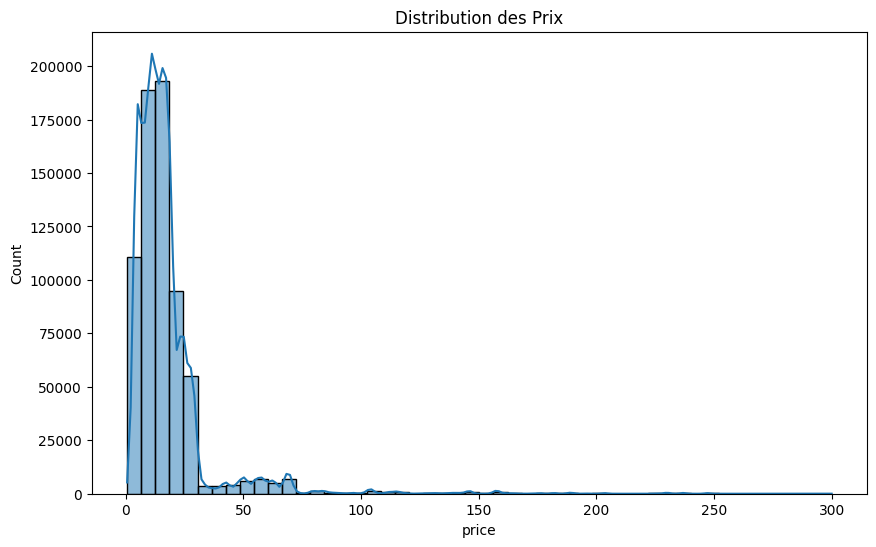

In [113]:
# Histogramme représentant la distribution  des prix
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_data['price'], bins=50, kde=True)
plt.title('Distribution des Prix')
plt.show()

# Il y a une large dispersion autour de la moyenne cela coherent avec l'écart type élévé
# Il y a des livres trés chers par rapport à la moyenne
# La ligne de densité confirme la concentration de la majorité des transactions dans les prix bas et l'asymétrie de la distribution


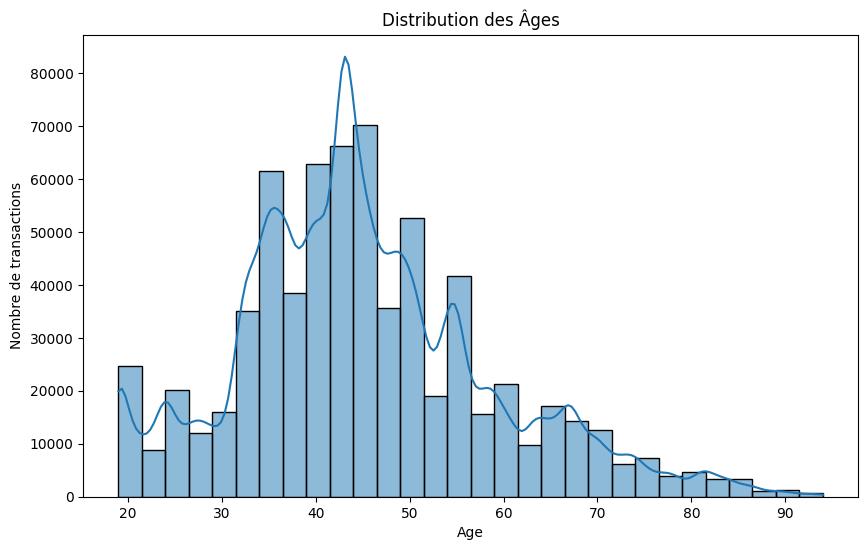

In [114]:
# Calculer l'âge des clients
current_year = 2023
final_merged_data['age'] = current_year - final_merged_data['birth']

# Histogramme des âges
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_data['age'], bins=30, kde=True)
plt.title('Distribution des Âges')
plt.xlabel('Age')
plt.ylabel('Nombre de transactions')
plt.show()

# Il y a un pic notable autour de la tranche d'age 40-50 ans
# Ces clients sont actifs en terme de transaction, cela pourraient indiquer un pouvoir d'achat plus élévés ou un interet plus marqué pour les livre de ce groupe
# Les tranches d'age plus jeunes et plus agées( au dela de 70 ans) ont effectué moins de transactions comme le montrent les barres plus basses sur l'histogramme


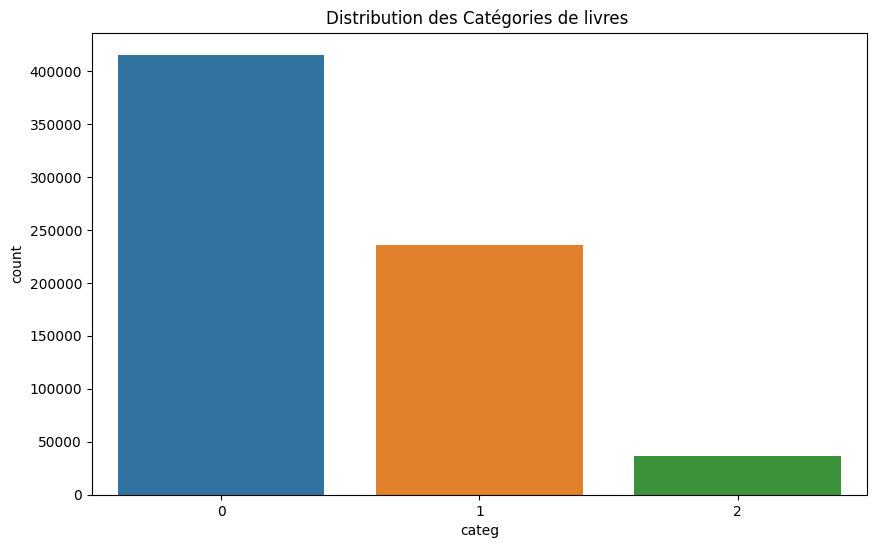

In [115]:
# Distribution des catégories( Diagramme à Barre)
plt.figure(figsize=(10, 6))
sns.countplot(x='categ', data=final_merged_data)
plt.title('Distribution des Catégories de livres ')
plt.show()

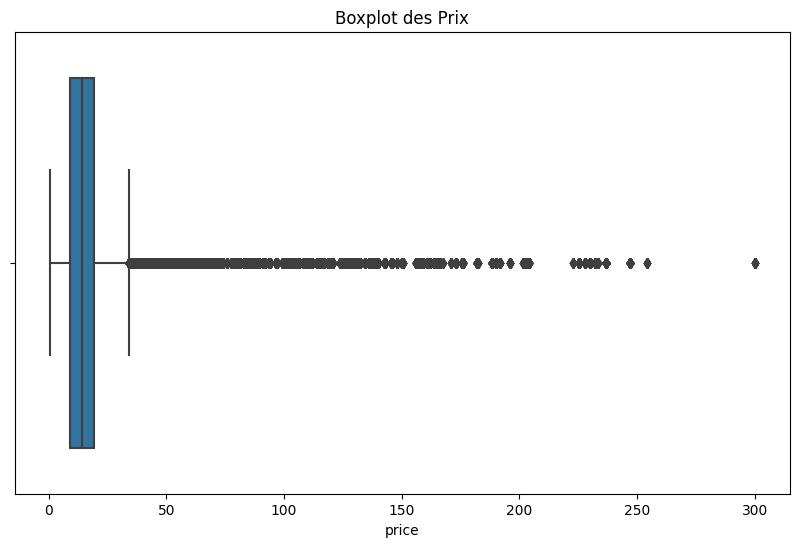

In [116]:
# Recherche des outliers
# 1.Boxplot pour les prix
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_merged_data['price'])
plt.title('Boxplot des Prix')
plt.show()

In [117]:
# Calculer Q1, Q3 et l'IQR
Q1 = final_merged_data['price'].quantile(0.25)
Q3 = final_merged_data['price'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer l'ensemble des données pour isoler les outliers
outliers = final_merged_data[(final_merged_data['price'] < lower_bound) | (final_merged_data['price'] > upper_bound)]

# Afficher les outliers
print(outliers)
# la taille d'extrait est grand pour un ensemble d'outliers
# Les prix sont considérés comme chers par rapport à la moyenne mais ces sont des valeurs normales
# Ils pourraient etre des livres d'éditions spéciales , de collection rare signé par l'auteur ou ayant une importance historique ou artistique particulière


       id_prod                       date session_id client_id sex  birth  \
29194     1_10 2021-03-10 18:21:44.538820     s_4503     c_664   m   1960   
29195     1_10 2021-04-28 21:30:47.290104    s_27146    c_1609   m   1980   
29196     1_10 2021-08-22 14:45:30.620297    s_79219    c_1609   m   1980   
29197     1_10 2021-12-03 13:20:56.948621   s_128808    c_1609   m   1980   
29198     1_10 2022-04-22 14:45:30.620297   s_197786    c_1609   m   1980   
...        ...                        ...        ...       ...  ..    ...   
687522    2_30 2022-05-02 23:43:51.054604   s_202765     c_599   m   1999   
687529    2_81 2022-02-19 14:51:58.078656   s_167662    c_7616   m   1993   
687531   1_408 2021-09-26 06:52:02.225335    s_95708    c_7402   m   1945   
687532   1_408 2022-11-26 06:52:02.225335   s_302962    c_7402   m   1945   
687533   1_408 2023-01-26 06:52:02.225335   s_332548    c_7402   m   1945   

         price  categ  categ_from_id      CA  age  
29194    78.83      1  

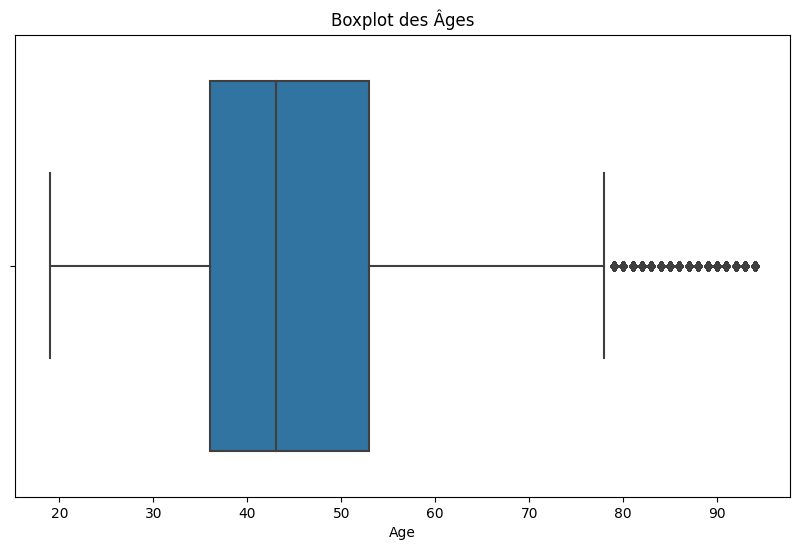

In [118]:
current_year = 2023
final_merged_data['age'] = current_year - final_merged_data['birth']

# Boxplot pour les âges
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_merged_data['age'])
plt.title('Boxplot des Âges')
plt.xlabel('Age')
plt.show()
# Les points situés au dela des moustaches représentent les valeurs aberrantes en terme d'age
# Ces valeurs ne représentent pas la majorité des clients

In [119]:
# Calcul des quartiles
Q1 = final_merged_data['age'].quantile(0.25)
Q3 = final_merged_data['age'].quantile(0.75)
IQR = Q3 - Q1

# Calcul des bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des outliers
outliers = final_merged_data [(final_merged_data['age'] < lower_bound) | (final_merged_data['age'] > upper_bound)]
print(outliers)

       id_prod                       date session_id client_id sex  birth  \
208     0_1259 2021-12-29 22:50:43.442553   s_142064    c_5985   f   1935   
209     0_1259 2022-03-29 22:50:43.442553   s_186535    c_5985   f   1935   
210     0_1259 2022-05-29 22:50:43.442553   s_216060    c_5985   f   1935   
573      1_498 2022-01-12 03:52:54.181806   s_148558    c_7023   f   1940   
574      1_498 2023-01-12 03:52:54.181806   s_325639    c_7023   f   1940   
...        ...                        ...        ...       ...  ..    ...   
686889  0_1674 2021-09-18 15:03:22.906759    s_91794    c_6468   m   1942   
686890  0_1674 2022-05-18 15:03:22.906759   s_210495    c_6468   m   1942   
686891  0_1674 2022-12-18 15:03:22.906759   s_313979    c_6468   m   1942   
687005   1_496 2022-01-14 23:16:33.191618   s_149911    c_5985   f   1935   
687006   1_496 2022-10-14 23:16:33.191618   s_282606    c_5985   f   1935   

        price  categ  categ_from_id     CA  age  
208     11.99      0     

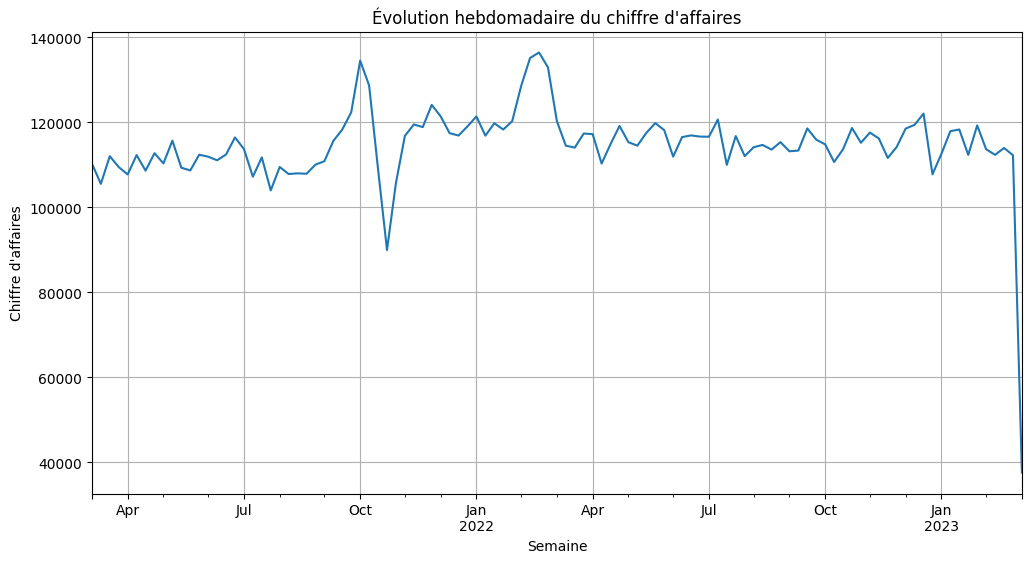

In [120]:
# Graphique d'évolution hebdomadaire du chiffre d'affaires
weekly_revenue = final_merged_data.resample('W', on='date')['price'].sum()

plt.figure(figsize=(12, 6))
weekly_revenue.plot()
plt.title('Évolution hebdomadaire du chiffre d\'affaires')
plt.xlabel('Semaine')
plt.ylabel('Chiffre d\'affaires')
plt.grid(True)
plt.show()


# on observe des variations hebdomadaire du chiffre d'affaire
# Il y a des pics et des creux

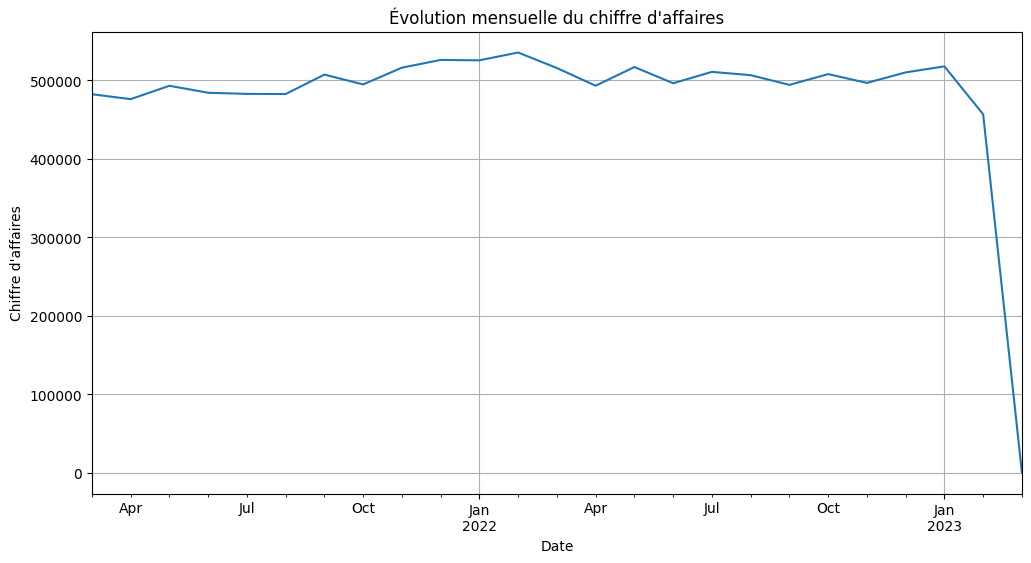

In [121]:
# une vue mensuelle sur l'evolution de chiffre d'affaires
monthly_revenue = final_merged_data.resample('M', on='date')['price'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot()
plt.title('Évolution mensuelle du chiffre d\'affaires')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.grid(True)
plt.show()

# Mise à part les variation le chiffre d'affaire semble relativement stable

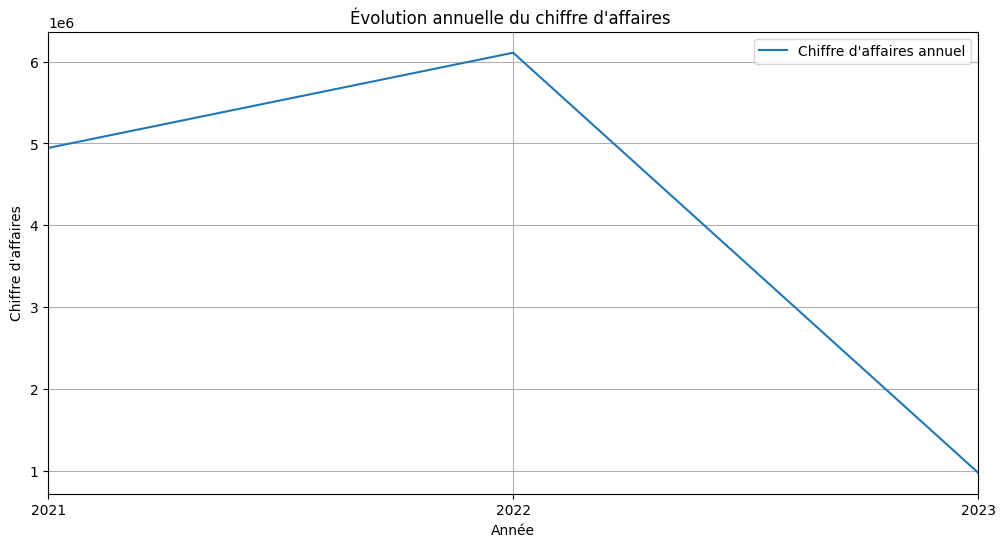

In [122]:
# Resampler les données pour obtenir la somme annuelle du chiffre d'affaires
annual_revenue = final_merged_data.resample('Y', on='date')['price'].sum()
plt.figure(figsize=(12,6))
annual_revenue.plot(label='Chiffre d\'affaires annuel')
plt.title("Évolution annuelle du chiffre d'affaires ")
plt.xlabel('Année')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.grid(True)
plt.show()

# Le graphique montre une série temporelle de l'évolution annuelle du chiffre d'affaires sur trois ans de 2021 à 2023
# Croissance en 2021-2022/Chute importante en 2023
# L'année 2023 n'est pas encore terminé la chute pourrait simplement refleter une image partielle qui pourrait s'améliorer avec le temps

In [123]:
# Evolution annuelle du chiffre d'affaires

# Aggrégation du chiffre d'affaires par année
annual_revenue = final_merged_data.groupby(final_merged_data['date'].dt.year)['price'].sum()

# Vérifier les données aggrégées
print(annual_revenue)

date
2021    4944399.44
2022    6108612.97
2023     974650.69
Name: price, dtype: float64


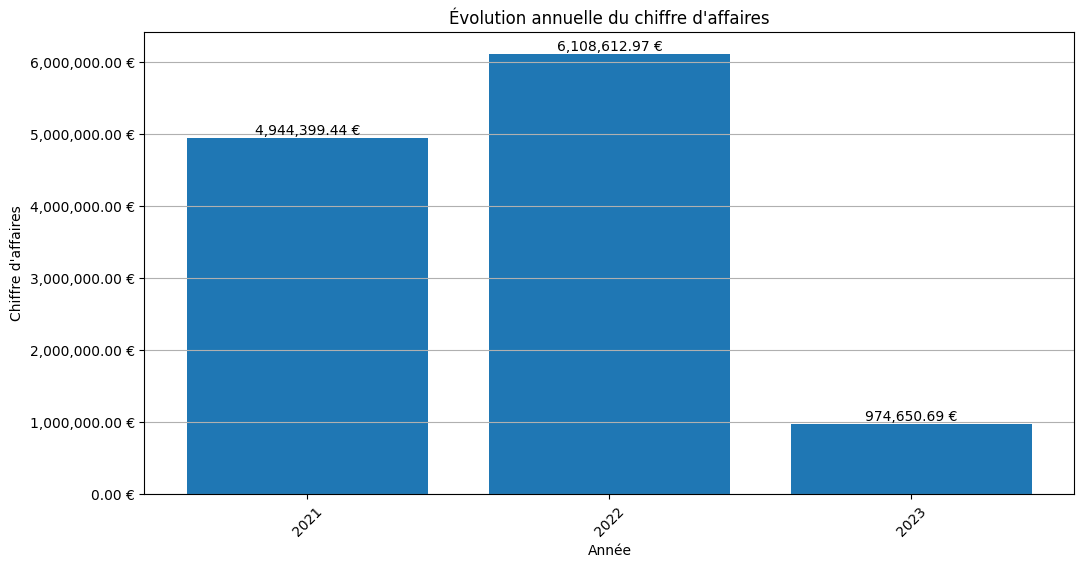

In [124]:
import matplotlib.ticker as mtick

#les chiffres d'affaires annuels
# 2021    4944399.44
# 2022    6108612.97
# 2023     974650.69
# Name: price, dtype: float64

# Tracé
plt.figure(figsize=(12,6))
# Création du bar plot
plt.bar(annual_revenue.index.astype(str), annual_revenue.values)

# Ajout de titres et étiquettes
plt.title("Évolution annuelle du chiffre d'affaires")
plt.xlabel('Année')
plt.ylabel('Chiffre d\'affaires')

# Formatage des étiquettes de l'axe des y pour afficher des valeurs monétaires
formatter = mtick.StrMethodFormatter('{x:,.2f} €')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajout des étiquettes de valeurs sur les barres
for index, value in enumerate(annual_revenue.values):
    plt.text(index, value, f'{value:,.2f} €', ha='center', va='bottom')

# Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajout de la grille sur l'axe des y
plt.grid(True, axis='y')

# Affichage du graphique
plt.show()


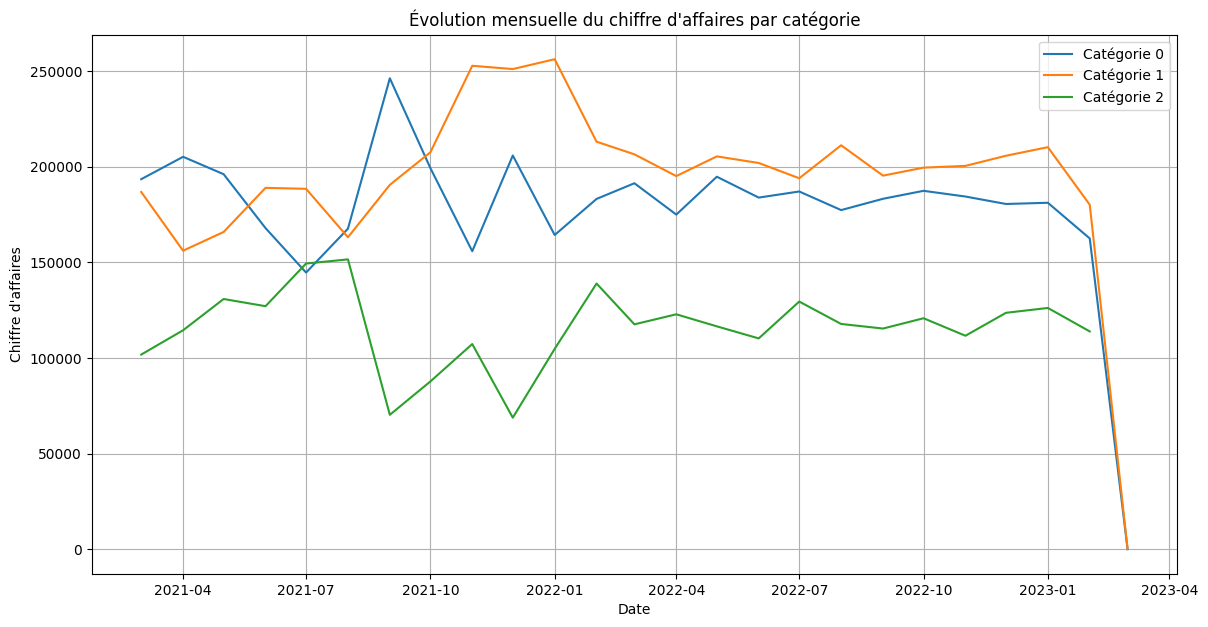

In [125]:
# Aggrégation du chiffre d'affaires par catégorie et par période.
monthly_revenue_by_category= final_merged_data.groupby([final_merged_data['date'].dt.to_period('M'), 'categ'])['price'].sum().unstack()

# Convertir le GroupBy object en DataFrame pour faciliter le tracé
monthly_revenue_by_category_df = monthly_revenue_by_category.reset_index()

# Convertir la période en datetime pour le tracé
monthly_revenue_by_category_df['date'] = monthly_revenue_by_category_df['date'].dt.to_timestamp()

# Tracer l'évolution du chiffre d'affaires par catégorie
plt.figure(figsize=(14, 7))

# Pour chaque catégorie
for category in monthly_revenue_by_category_df.columns[1:]:
    plt.plot(monthly_revenue_by_category_df['date'], monthly_revenue_by_category_df[category], label=f'Catégorie {category}')

plt.title('Évolution mensuelle du chiffre d\'affaires par catégorie')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.grid(True)
plt.show()

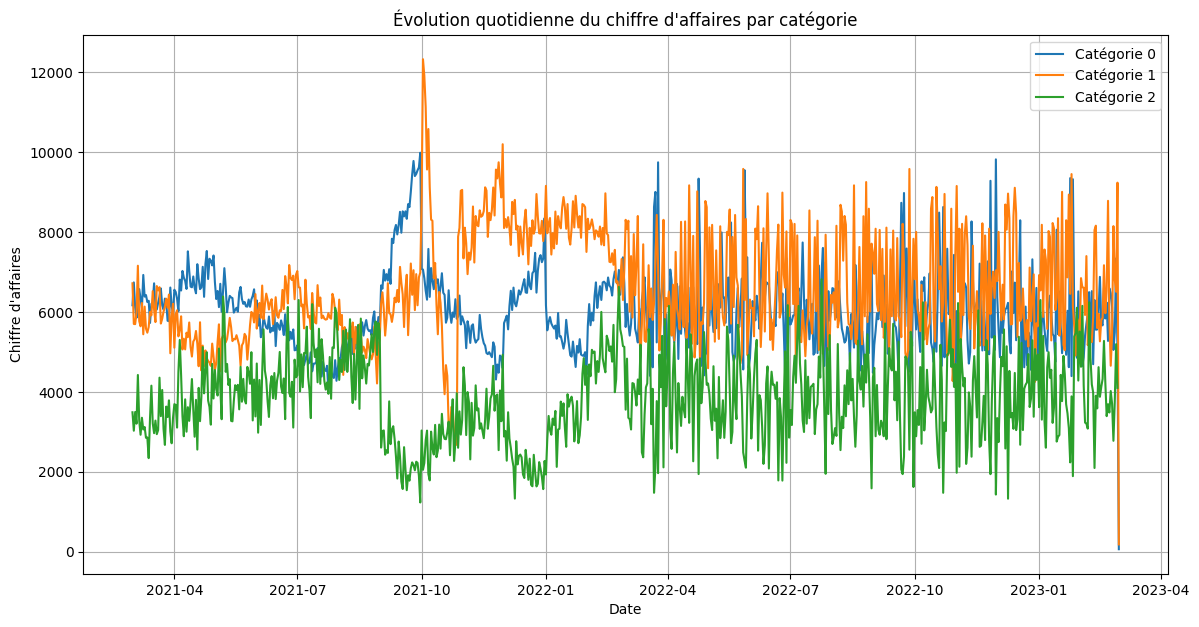

In [126]:
# Aggrégation du chiffre d'affaires par catégorie et par jour
daily_revenue_by_category = final_merged_data.groupby([final_merged_data['date'].dt.date, 'categ'])['price'].sum().unstack()

# Convertir le GroupBy object en DataFrame pour faciliter le tracé
daily_revenue_by_category_df = daily_revenue_by_category.reset_index()

# Convertir la date en datetime pour le tracé
daily_revenue_by_category_df['date'] = pd.to_datetime(daily_revenue_by_category_df['date'])

# Tracer l'évolution du chiffre d'affaires par catégorie
plt.figure(figsize=(14, 7))

# Pour chaque catégorie
for category in daily_revenue_by_category_df.columns[1:]:
    plt.plot(daily_revenue_by_category_df['date'], daily_revenue_by_category_df[category], label=f'Catégorie {category}')

plt.title('Évolution quotidienne du chiffre d\'affaires par catégorie')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.grid(True)
plt.show()

# Il y a des pics surtout dans les catégories 0 et 1 qui pourraient repésenter des évenements spéciaux qui ont stimulé les ventes

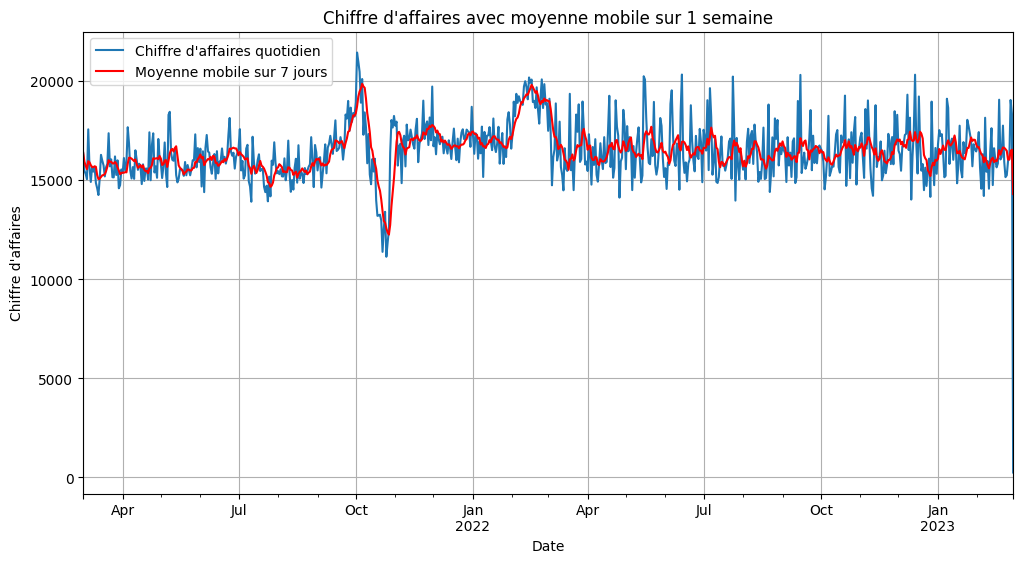

In [127]:
# Aggrégation du chiffre d'affaires par jour
# Resample pour obtenir une somme quotidienne du chiffre d'affaires
daily_revenue = final_merged_data.resample('D', on='date')['price'].sum()

# Calcul de  la moyenne mobile sur 7 jours
rolling_mean_7days = daily_revenue.rolling(window=7, min_periods=1).mean()

# Affichage des résultats
plt.figure(figsize=(12,6))
daily_revenue.plot(label='Chiffre d\'affaires quotidien')
rolling_mean_7days.plot(color='red', label='Moyenne mobile sur 7 jours')
plt.title('Chiffre d\'affaires avec moyenne mobile sur 1 semaine')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.grid(True)
plt.show()

# La ligne bleu présente des variations importantes ce qui est typique des données de ventes quotidienne
# La ligne rouge lisse les variations quotidienne et montre une tendance plus claire de chiffre d'affaire

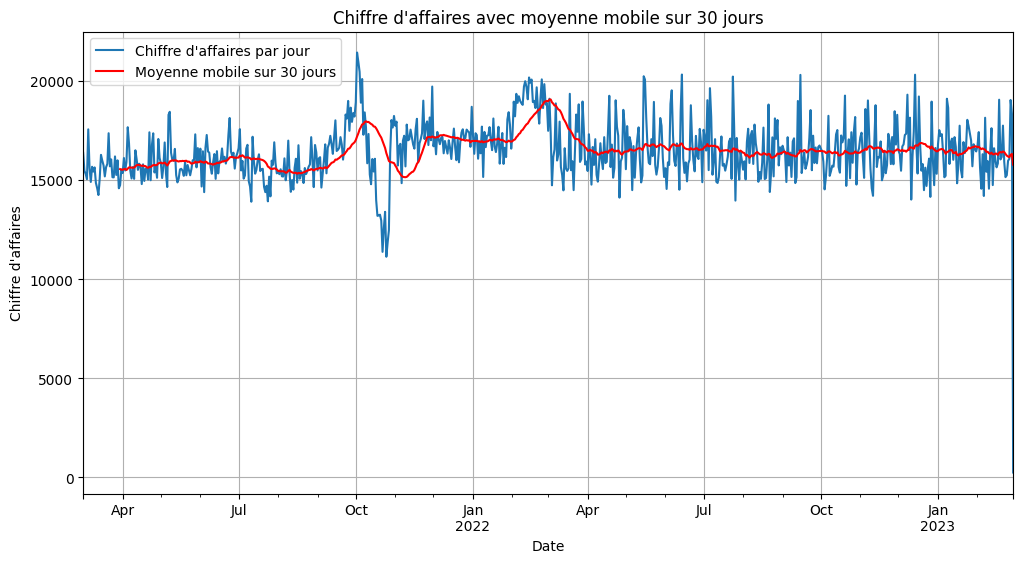

In [128]:
# Aggrégation du chiffre d'affaires par jour
# Resample pour obtenir une somme quotidienne du chiffre d'affaires
daily_revenue = final_merged_data.resample('D', on='date')['price'].sum()

# Calcul de la moyenne mobile sur 30 jours
rolling_mean_30 = daily_revenue.rolling(window=30).mean()

# Affichage des résultats
plt.figure(figsize=(12, 6))
daily_revenue.plot(label='Chiffre d\'affaires par jour')
rolling_mean_30.plot(label='Moyenne mobile sur 30 jours', color='red')
plt.title('Chiffre d\'affaires avec moyenne mobile sur 30 jours')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.grid()
plt.show()

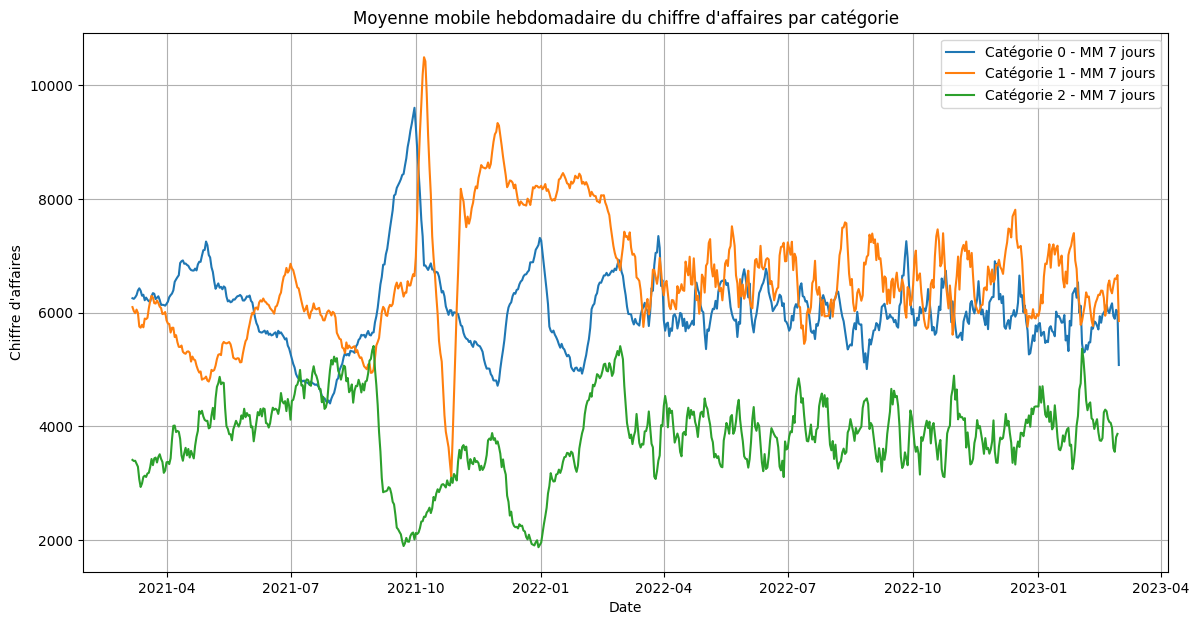

In [129]:

# Aggrégation du chiffre d'affaires par catégorie et par jour
daily_revenue_by_category = final_merged_data.groupby('categ').resample('D', on='date')['price'].sum()

# Réinitialisation de l'index
daily_revenue_by_category = daily_revenue_by_category.reset_index()

# Pivotement des données
daily_revenue_by_category_pivot = daily_revenue_by_category.pivot(index='date', columns='categ', values='price')

# Calcul de la moyenne mobile sur 7 jours
rolling_means = daily_revenue_by_category_pivot.rolling(window=7).mean()

# Tracé du graphique
plt.figure(figsize=(14, 7))
for category in rolling_means.columns:
    plt.plot(rolling_means.index, rolling_means[category], label=f'Catégorie {category} - MM 7 jours')

plt.title('Moyenne mobile hebdomadaire du chiffre d\'affaires par catégorie')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.grid(True)
plt.show()

# # Il y a des pics qui pourraient indiquer des évenements spéciaux qui ont généré un volume de vente élévé

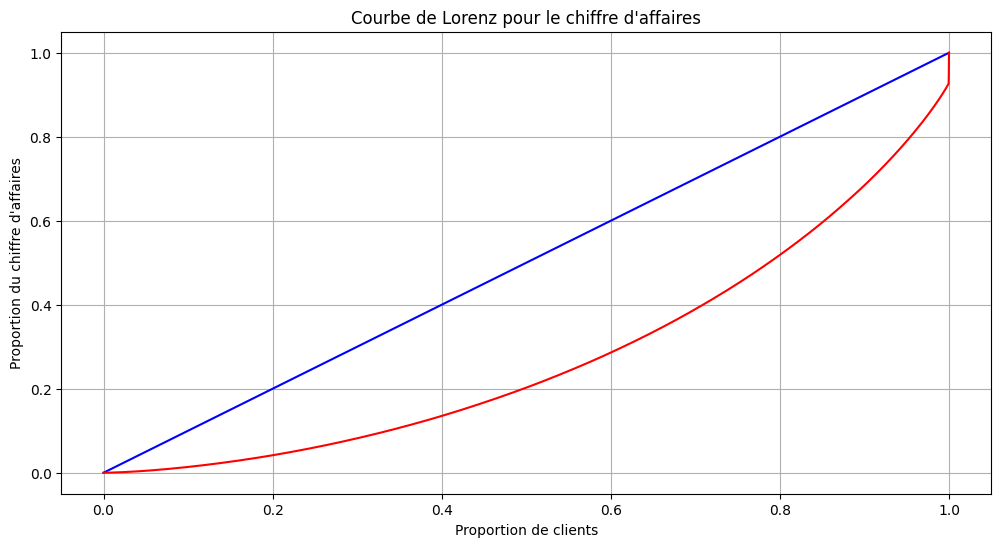

In [130]:
# Courbe de Lorenz pour le chiffre d'affaire
client_turnover = final_merged_data.groupby('client_id')['price'].sum().sort_values()

cumulated_turnover = client_turnover.cumsum() / client_turnover.sum()

plt.figure(figsize=(12, 6))
plt.plot([0, 1], [0, 1], color='blue')
plt.plot(np.linspace(0, 1, len(cumulated_turnover)), cumulated_turnover, color='red')
plt.title("Courbe de Lorenz pour le chiffre d'affaires")
plt.xlabel("Proportion de clients")
plt.ylabel("Proportion du chiffre d'affaires")
plt.grid(True)
plt.show()

# La courbe de Lorenz s'écarte de la ligne d'égalité , ce qui indique que le CA n'est pas également réparti parmi tous les clients
# Quelques clients sont responsables d'une grandes parties de chiffre d'affaires
# Comme pour le CA, le nombre de transaction montre une concentration des activités chez un petit groupe des clients trés actifs

In [131]:
# Calculer l'aire sous la courbe de Lorenz
area_under_lorenz_curve = np.trapz(cumulated_turnover, dx=1/len(cumulated_turnover))

# L'aire sous la ligne d'équité serait de 0,5 (aire sous le triangle)
area_under_line_of_equality = 0.5

# Calculer l'indice de Gini
gini_index = (area_under_line_of_equality - area_under_lorenz_curve) / area_under_line_of_equality

print("L'indice de Gini est :", gini_index)

L'indice de Gini est : 0.4418958800171595


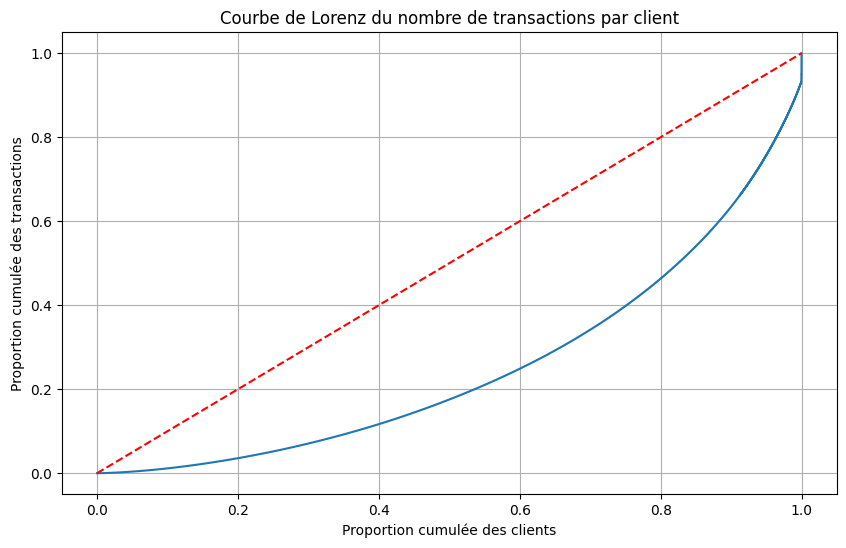

In [132]:
# le nombre de transactions par client
transactions_per_client = final_merged_data['client_id'].value_counts()

# Trier les clients par le nombre croissant de transactions
sorted_transactions = transactions_per_client.sort_values()

# Calculer les proportions cumulées
cumulative_transactions = np.cumsum(sorted_transactions) / sorted_transactions.sum()
cumulative_clients = np.arange(1, len(sorted_transactions) + 1) / len(sorted_transactions)

# Créer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(cumulative_clients, cumulative_transactions, drawstyle='steps-post')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ligne d'équité

# Ajouter des titres et des étiquettes
plt.title('Courbe de Lorenz du nombre de transactions par client')
plt.xlabel('Proportion cumulée des clients')
plt.ylabel('Proportion cumulée des transactions')

# Afficher le graphique
plt.grid(True)
plt.show()

In [133]:
# L'aire sous la courbe de Lorenz
B = np.trapz(cumulative_transactions, cumulative_clients)

# L'indice de Gini
Gini = 1 - 2 * B

print(f"L'indice de Gini est : {Gini}")

L'indice de Gini est : 0.49385560653203386


In [134]:
# Total du chiffre d'affaires par catégorie
ca_categ = final_merged_data.groupby('categ').sum()['price']
print(ca_categ)


categ
0    4419730.97
1    4827657.11
2    2780275.02
Name: price, dtype: float64


<ipython-input-134-c65f96ba2e09>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ca_categ = final_merged_data.groupby('categ').sum()['price']


In [135]:
# Top 10 des clients en termes de chiffre d'affaires
ca_client = final_merged_data.groupby('client_id').sum()['price']
top_clients = ca_client.sort_values(ascending=False).head(10)
print(top_clients)


client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
c_3263      5276.87
c_2140      5260.18
c_2899      5214.05
c_7319      5155.77
c_7959      5135.75
Name: price, dtype: float64


<ipython-input-135-ce3485adf937>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ca_client = final_merged_data.groupby('client_id').sum()['price']


In [136]:
# Transformer la série top_clients en DataFrame pour fusionner avec les informations des clients
top_clients_df = top_clients.reset_index()

# Fusionner les données des clients pour obtenir le sexe et l'année de naissance
top_clients_info = top_clients_df.merge(customers, on='client_id', how='left')

# Calculer l'âge des clients
current_year = dt.datetime.now().year
top_clients_info['age'] = current_year - top_clients_info['birth']

# Afficher les résultats
print(top_clients_info[['client_id', 'price', 'age', 'sex']])

  client_id      price  age sex
0    c_1609  326039.89   43   m
1    c_4958  290227.03   24   m
2    c_6714  153918.60   55   f
3    c_3454  114110.57   54   m
4    c_1570    5285.82   44   f
5    c_3263    5276.87   38   f
6    c_2140    5260.18   46   f
7    c_2899    5214.05   29   f
8    c_7319    5155.77   49   f
9    c_7959    5135.75   49   f


In [137]:
# Tri des clients par chiffre d'affaires en ordre ascendant
bottom_clients = ca_client.sort_values(ascending=True).head(10)

# Transformation en DataFrame pour la fusion
bottom_clients_df = bottom_clients.reset_index()

# Fusion avec les informations démographiques des clients
bottom_clients_info = bottom_clients_df.merge(customers, on='client_id', how='left')

# Calcul de l'âge actuel des clients
current_year = dt.datetime.now().year
bottom_clients_info['age'] = current_year - bottom_clients_info['birth']

# Affichage des résultats
print(bottom_clients_info[['client_id', 'price', 'age', 'sex']])

  client_id  price  age sex
0    c_8351   6.31   55   f
1    c_8140   8.30   52   m
2    c_8114   9.98   61   m
3    c_4648  11.20   19   m
4    c_4478  13.36   53   f
5    c_6040  15.72   49   f
6    c_5919  15.98   68   f
7    c_5829  16.07   34   f
8    c_8032  17.64   19   m
9    c_4976  17.89   66   m


In [138]:
# Top 10 des produits les plus vendus
top_products = final_merged_data.groupby('id_prod').size().sort_values(ascending=False).head(10)
print(top_products)


id_prod
1_369    2340
1_417    2269
1_414    2246
1_498    2202
1_425    2163
1_403    2040
1_413    2036
1_412    2014
1_406    2003
1_407    2001
dtype: int64


In [139]:
top_products_with_category = (
    final_merged_data.groupby('id_prod')
    .size()
    .reset_index(name='count')
    .merge(products, on='id_prod', how='left')
    .sort_values(by='count', ascending=False)
    .head(10)
)

print(top_products_with_category[['id_prod', 'categ', 'count']])

     id_prod  categ  count
2591   1_369      1   2340
2644   1_417      1   2269
2641   1_414      1   2246
2733   1_498      1   2202
2653   1_425      1   2163
2629   1_403      1   2040
2640   1_413      1   2036
2639   1_412      1   2014
2632   1_406      1   2003
2633   1_407      1   2001


In [140]:
# les 10 produits les moins vendus
bottom_products = final_merged_data.groupby('id_prod').size().sort_values(ascending=True).head(10)

# Afficher les résultats
print(bottom_products)

id_prod
0_2201    1
0_1728    1
0_833     1
0_807     1
0_1539    1
0_1633    1
0_1151    1
0_1683    1
0_1498    1
2_98      1
dtype: int64


In [141]:
# Joindre les informations de catégorie avec les données des ventes des produits les moins vendus
bottom_products_with_category = (
    final_merged_data.groupby('id_prod')
    .size()
    .reset_index(name='count')
    .merge(products, on='id_prod', how='left')
    .sort_values(by='count', ascending=True)
    .head(10)
)

print(bottom_products_with_category[['id_prod', 'categ', 'count']])

     id_prod  categ  count
1327  0_2201      0      1
802   0_1728      0      1
2108   0_833      0      1
2079   0_807      0      1
595   0_1539      0      1
698   0_1633      0      1
166   0_1151      0      1
752   0_1683      0      1
549   0_1498      0      1
3263    2_98      2      1


# Etape 4- Analyses bivariées

### 4-1: le lien entre le genre et les catégories des livres achetés

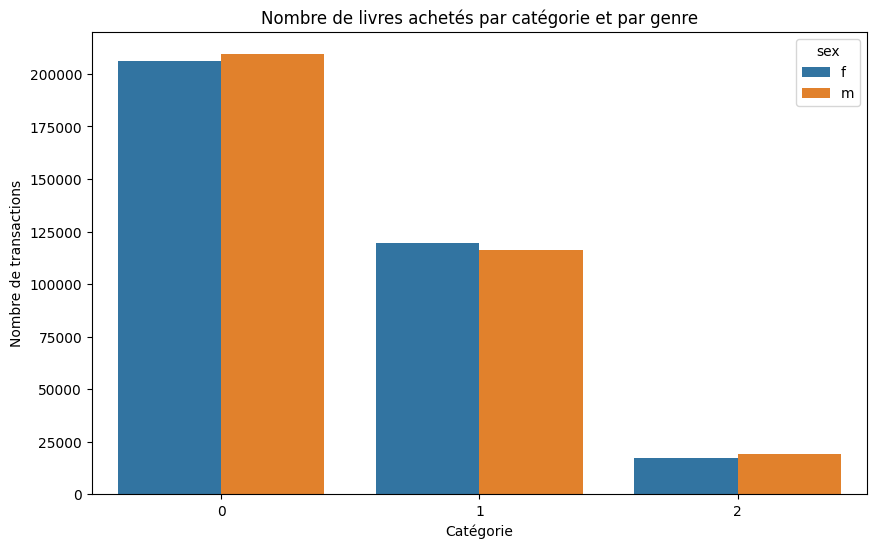

In [142]:
#4-1: Graphique en barres
plt.figure(figsize=(10, 6))
sns.countplot(x='categ', hue='sex', data=final_merged_data)
plt.title('Nombre de livres achetés par catégorie et par genre')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de transactions')
plt.show()

# Diagramme à barre qui montre le nombres de livre achetés reparti par catégorie et genre des clients
# Catégorie 0 : les hommes ont un nombre légérement plus élévés
# Catégorie 1 : les femmes ont une avance légère
# Ctégorie 2 : les deux genres achétent beaucoup moins de livres de cette catégorie

In [143]:
# Effectuer le test chi-2 et P-value:
cross_tab = pd.crosstab(final_merged_data['sex'], final_merged_data['categ'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

print(f"Chi-square test for gender and category: Chi2 = {chi2}, p-value = {p}")
# Le test Chi2 confirme qu'il y a une association significative entre le genre de client et la catégorie de  livre acheté
# Le P-Value est extremement faible indique que cette différence est statistiquement significative

Chi-square test for gender and category: Chi2 = 158.25417617304882, p-value = 4.3205822283997063e-35


### 4-2:  Le lien entre l'âge des clients et le montant total des achats

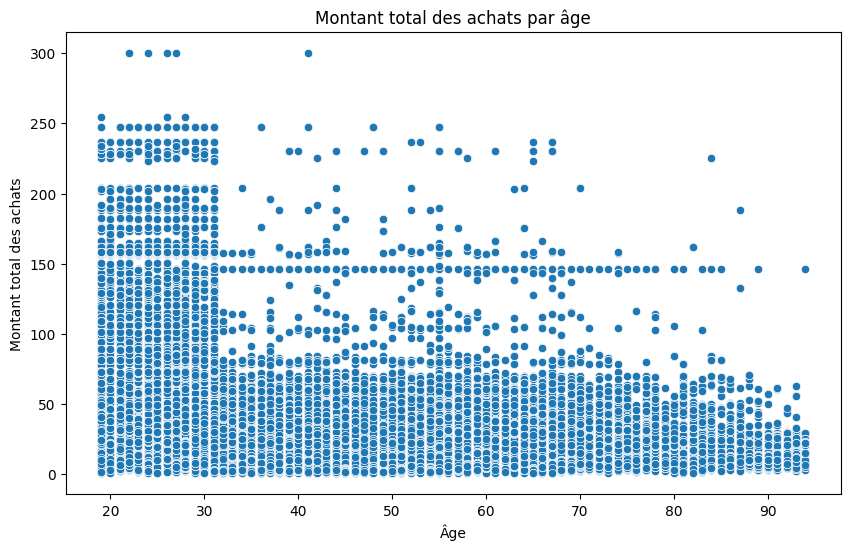

In [144]:
#4-2: Graphique en nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=final_merged_data)
plt.title('Montant total des achats par âge')
plt.xlabel('Âge')
plt.ylabel('Montant total des achats')
plt.show()

# Ce graphique en nuage de point illustre le montant total des achats par âge des clients
# Il n' y a pas de tendance claire indiquant que l'âge influence fortement le montant total des achats

In [145]:
# calcul de montant total des achats pour chaque client
total_purchase_by_client = final_merged_data.groupby('client_id')['price'].sum().reset_index(name='total_purchase')

# obtenir l'âge de chaque client (supposant qu'il est unique par client)
age_by_client = final_merged_data[['client_id', 'age']].drop_duplicates()

# Fusionner ces informations pour obtenir un DataFrame avec l'âge et le montant total des achats pour chaque client
merged_data = pd.merge(total_purchase_by_client, age_by_client, on='client_id')

# Calcul de la corrélation de Pearson et de la valeur p
correlation, p_value = pearsonr(merged_data['total_purchase'], merged_data['age'])

print(f"La corrélation entre l'âge et le montant total des achats est : {correlation}")
print(f"La valeur p de cette corrélation est : {p_value}")

La corrélation entre l'âge et le montant total des achats est : -0.03975597869436891
La valeur p de cette corrélation est : 0.00022625490557779147


### 4-3: le lien entre l'âge des clients et la fréquence d'achat

In [146]:
# Calcul de la fréquence d'achat pour chaque client
purchase_frequency_by_client = final_merged_data.groupby('client_id').size().reset_index(name='purchase_frequency')

# Obtener l'âge de chaque client
age_by_client = final_merged_data[['client_id', 'age']].drop_duplicates()

# Fusionner ces informations pour obtenir un DataFrame avec l'âge et la fréquence d'achat pour chaque client
merged_data = pd.merge(purchase_frequency_by_client, age_by_client, on='client_id')

# Calcul de la corrélation de Pearson et de la valeur p
correlation_frequency_age, p_value = pearsonr(merged_data['purchase_frequency'], merged_data['age'])

# Affichage du coefficient de corrélation et de la valeur p
print(f"Corrélation entre l'âge et la fréquence d'achat: {correlation_frequency_age}")
print(f"Valeur p de la corrélation: {p_value}")

# La coefficient est trés proche de zéro indiquant qu'il n 'y a pas de corrélation linéaire entre l'age et la fréquence d'achat
# la valeure P est supérieure au seuil commun de 5% confirme l'absence de corrélation

Corrélation entre l'âge et la fréquence d'achat: 0.006685851504448301
Valeur p de la corrélation: 0.5352991566324874


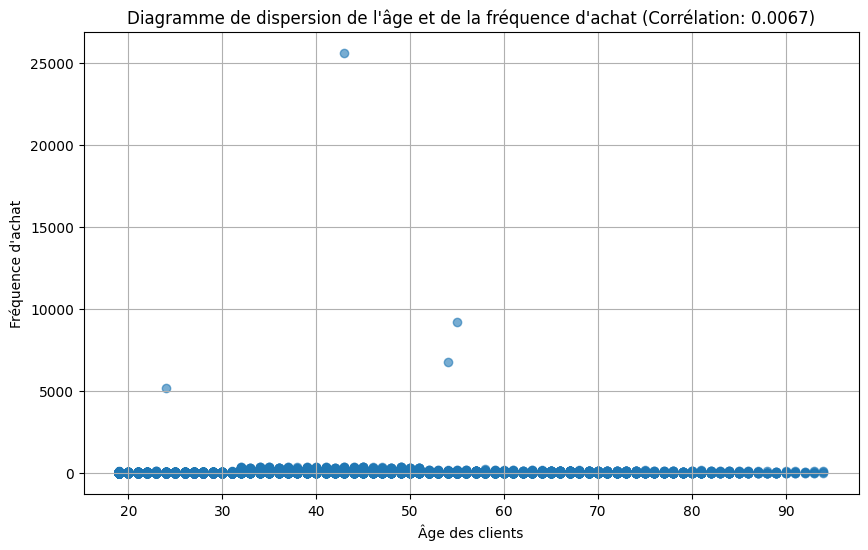

In [147]:
#4-3 :Création du diagramme de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['age'], merged_data['purchase_frequency'], alpha=0.6)

# Ajout de titres et de labels
plt.title(f"Diagramme de dispersion de l'âge et de la fréquence d'achat (Corrélation: {correlation_frequency_age:.4f})")
plt.xlabel('Âge des clients')
plt.ylabel('Fréquence d\'achat')
plt.grid(True)
plt.show()

# La plupart des points sont concentrés prés de l'axe horizontal indiquant que la plupart des clients quelque soit leurs âges éffectuent un nombre similaire d'achat
# Il y a quelques points qui s'éloignent nettement de groupe principale . Ces clients ont une fréquence d'achat élévés représentants des achéteurs en gros

Corrélation entre l'âge et la fréquence d'achat après nettoyage: 0.03032790187032987
Valeur p de la corrélation après nettoyage: 0.004922261715831482


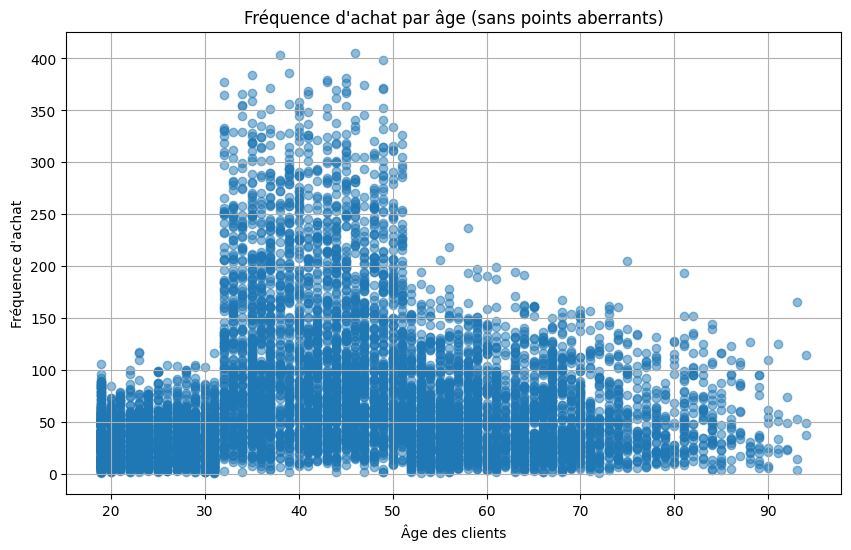

In [148]:
# Supposons que le seuil pour être considéré comme un point aberrant est de 5000 achats
seuil_aberrants = 5000

# Filtrer le DataFrame pour exclure les points aberrants
cleaned_data = merged_data[merged_data['purchase_frequency'] < seuil_aberrants]

# Recalcul de la corrélation de Pearson sans les points aberrants
correlation_frequency_age_cleaned, p_value_cleaned = pearsonr(cleaned_data['purchase_frequency'], cleaned_data['age'])

# Affichage des résultats
print(f"Corrélation entre l'âge et la fréquence d'achat après nettoyage: {correlation_frequency_age_cleaned}")
print(f"Valeur p de la corrélation après nettoyage: {p_value_cleaned}")

# Création du graphique
plt.figure(figsize=(10,6))
plt.scatter(cleaned_data['age'], cleaned_data['purchase_frequency'], alpha=0.5)
plt.title('Fréquence d\'achat par âge (sans points aberrants)')
plt.xlabel('Âge des clients')
plt.ylabel('Fréquence d\'achat')
plt.grid(True)
plt.show()

# Malgré une valeur p significative , il y a une trés faible corrélation positive entre l'âge des clients et la fréquence d'achat

### 4-4: le lien entre l'âge des clients et la taille du panier moyen

In [149]:
# Calcul la taille moyenne du panier pour chaque client
average_basket_size_by_client = final_merged_data.groupby('client_id')['price'].mean().reset_index(name='average_basket_size')

# Obtenir l'âge de chaque client (en supposant que l'âge est unique pour chaque client_id)
age_by_client = final_merged_data[['client_id', 'age']].drop_duplicates()

# Fusionner ces informations pour obtenir un DataFrame avec l'âge et la taille moyenne du panier pour chaque client
merged_data = pd.merge(average_basket_size_by_client, age_by_client, on='client_id')

# Calcul de la corrélation de Pearson et de la valeur p
correlation_basket_age, p_value_basket_age = pearsonr(merged_data['average_basket_size'], merged_data['age'])

# Affichage du coefficient de corrélation et de la valeur p
print(f"Corrélation entre l'âge et la taille du panier moyen: {correlation_basket_age}")
print(f"Valeur p de la corrélation: {p_value_basket_age}")

# La coefficient de corrélation indique une corrélation négative
# La valeur P est inférieure à 0.05 on rejéte l'hypothése nulle


Corrélation entre l'âge et la taille du panier moyen: -0.5106560259205026
Valeur p de la corrélation: 0.0


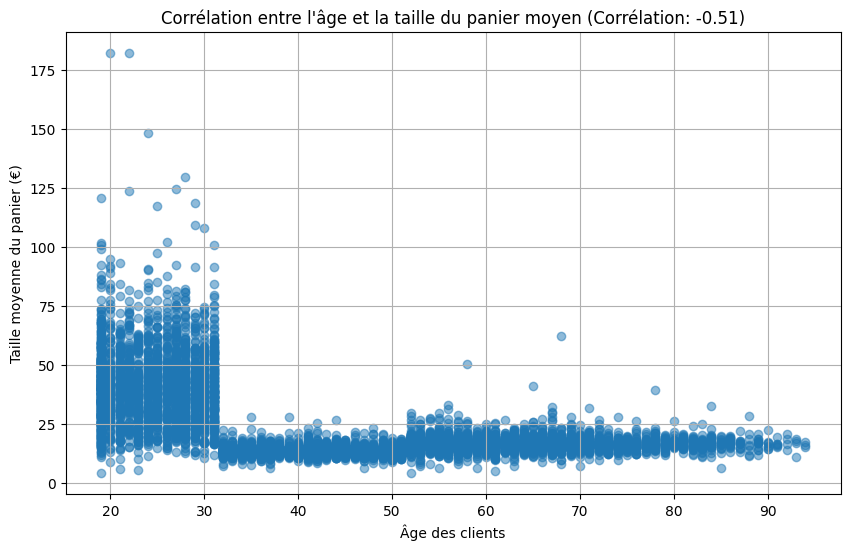

In [150]:
#4-4: Création du diagramme de dispersion
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['age'], merged_data['average_basket_size'], alpha=0.5)

# Personnalisation du graphique
plt.title(f"Corrélation entre l'âge et la taille du panier moyen (Corrélation: {-0.5107:.2f})")
plt.xlabel('Âge des clients')
plt.ylabel('Taille moyenne du panier (€)')
plt.grid(True)
plt.show()

# A mésure que l'age des clients augmente la taille moyenne de la panier ( en terme de dépense) a tendance à diminuer

### 4-5: le lien entre l'âge des clients et la catégorie des livres achetés

In [151]:
# Séparation des âges par catégorie de livre
age_by_categ = [group['age'].values for name, group in final_merged_data.groupby('categ')]

# Test de Shapiro-Wilk pour la normalité pour chaque catégorie de livre
shapiro_results = {name: stats.shapiro(group['age'].values) for name, group in final_merged_data.groupby('categ')}

# Test de Levene pour l'égalité des variances entre les catégories de livre
levene_result = stats.levene(*age_by_categ)

# Affichage des résultats
print("Résultats du test de Shapiro-Wilk pour la normalité :")
for categ, result in shapiro_results.items():
    print(f"Catégorie {categ}: Statistique = {result[0]}, p-valeur = {result[1]}")

print("\nRésultat du test de Levene pour l'égalité des variances :")
print(f"Statistique = {levene_result.statistic}, p-valeur = {levene_result.pvalue}")

# Les résultats montrent que les données ne suivent pas une distribution et que les variances ne sont pas égales
# les tests de Shapiro-Wilk et de Levene ont rejétés les hypothéses de normalité et d'égalité de variances

Résultats du test de Shapiro-Wilk pour la normalité :
Catégorie 0: Statistique = 0.9367274045944214, p-valeur = 0.0
Catégorie 1: Statistique = 0.9905856847763062, p-valeur = 0.0
Catégorie 2: Statistique = 0.6679463386535645, p-valeur = 0.0

Résultat du test de Levene pour l'égalité des variances :
Statistique = 26975.65495205032, p-valeur = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [152]:
# Comparer chaque groupe d'âges à une distribution normale
for name, group in final_merged_data.groupby('categ'):
    ks_statistic, p_value = stats.kstest(group['age'], 'norm')
    print(f"Catégorie {name}: Statistique KS = {ks_statistic}, p-valeur = {p_value}")

# Le test de Kolmogorov-Smirnov montre que la distribution des âges dans chaque catégorie est entièrement  différente de la distribution normale
# Le P valeur indique que les distributions d'âge dans chaque catégorie ne correspondent pas à une distribution normale

Catégorie 0: Statistique KS = 1.0, p-valeur = 0.0
Catégorie 1: Statistique KS = 1.0, p-valeur = 0.0
Catégorie 2: Statistique KS = 1.0, p-valeur = 0.0


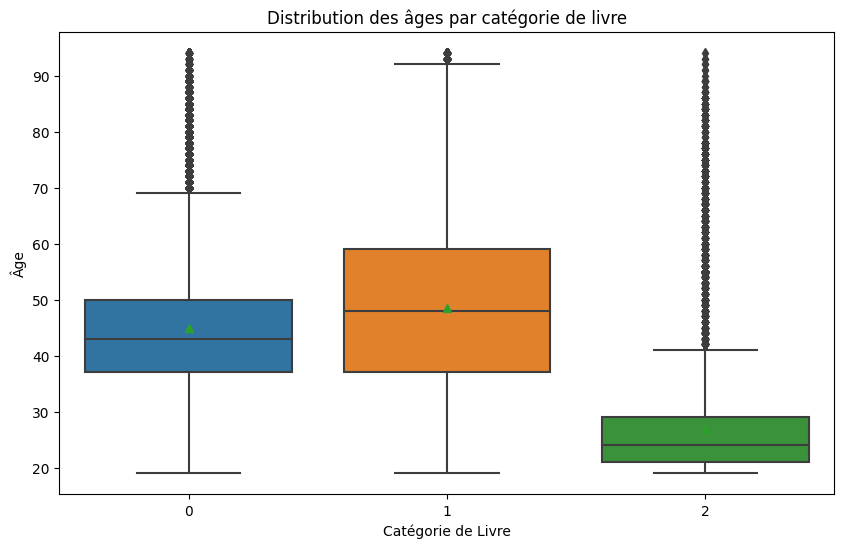

In [153]:
#4-5: Création du boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='categ', y='age', showmeans='True', data=final_merged_data)

plt.title('Distribution des âges par catégorie de livre')
plt.xlabel('Catégorie de Livre')
plt.ylabel('Âge')
plt.show()